In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import prepare as p

import nltk
import nltk.sentiment

from wordcloud import WordCloud

## Acquire and Prepare

In [2]:
# read json
df = pd.read_json('data.json')

In [3]:
# create dataframe
df = p.create_df(df)

In [4]:
#sanity check
df

,repo,language,original,lemmatized
0,acidanthera/AppleALC,C++,AppleALC\n========\n\n[![Build Status](https:/...,applealc acidanthera applealc workflow ci badg...
1,gongjianhui/AppleDNS,Python,# Final AppleDNS Pro\n\nAppleDNS 通过收集 Apple 在中...,final appledns pro appledns cdn itunes icloud ...
2,tomaz/appledoc,Objective-C,About appledoc\n==============\n\n**IMPORTANT ...,appledoc important notice collaborator needed ...
3,robovm/apple-ios-samples,Objective-C,# Mirror of Apple's iOS samples\n\nThis reposi...,mirror io sample repository mirror io sample l...
4,appleseedhq/appleseed,C++,# appleseed [![Build Status](https://travis-ci...,appleseed travis ci appleseedhq appleseed svg ...
...,...,...,...,...
481,PatMurrayDEV/apple-music-history,JavaScript,[![Netlify Status](https://api.netlify.com/api...,netlify api netlify api v1 badge e207d990 1ee1...
482,antongorodezkiy/codeigniter-apns,PHP,"Codeigniter-apns\n(c) 2012, Anton Gorodezkiy\n...",codeigniter apns c 2012 anton gorodezkiy codei...
484,lprhodes/homebridge-apple-tv,JavaScript,# Homebridge Apple TV\n\n## Introduction\nWelc...,homebridge tv welcome tv plugin homebridge nfa...
485,lvsti/CoreMediaIO-DAL-Example,C++,# CoreMediaIO-DAL-Example\n\nModernized and ex...,coremediaio dal example modernized extended co...


#### Drop original column

In [5]:
df = df.drop(columns={'original'})

---

## Explore

#### I'll start by splitting the dataframe by languages

In [8]:
# Swift programming language
swift = df[df.language == 'Swift']

# JavaScript programming language
javascript = df[df.language == 'JavaScript']

# Objective-C programming language
objective_c = df[df.language == 'Objective-C']

# Python programming language
python = df[df.language == 'Python']

# C programming language
c = df[df.language == 'C']

# Java programming language
java = df[df.language == 'Java']

# C++ programming language
c_plus_plus = df[df.language == 'C++']

# Shell programming language
shell = df[df.language == 'Shell']

# PHP programming language
php = df[df.language == 'PHP']

# C# programming language
c_sharp = df[df.language == 'C#']

---

## Swift Dataset

#### Set up for trigrams exploration

In [11]:
# create variable for strings in swift
swift_words = ' '.join(swift.lemmatized)

In [12]:
# create trigram
swift_trigrams = pd.Series(nltk.ngrams(swift_words.split(), 3))

In [13]:
# create count for top 25 trigrams
top_25_swift_trigrams = swift_trigrams.value_counts().head(25).sort_values(ascending=False)

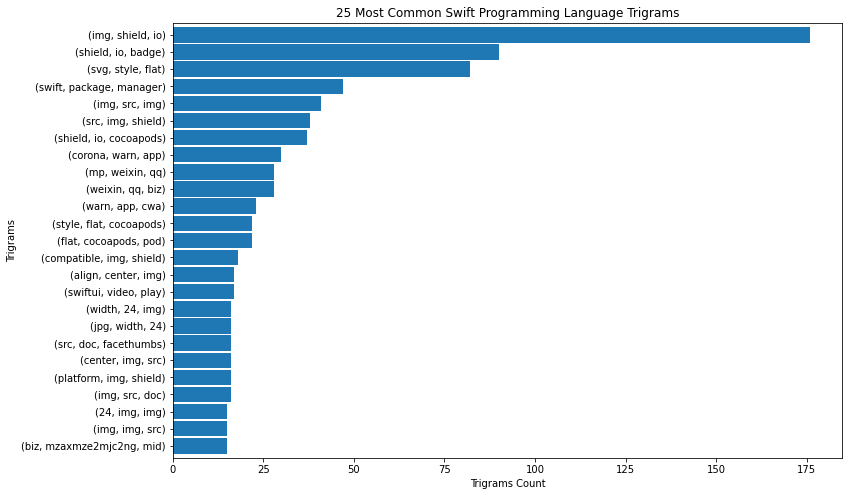

In [14]:
# graph the most frequent trigrams
top_25_swift_trigrams.sort_values().plot.barh(width = .9, figsize=(12,8))
plt.xlabel('Trigrams Count')
plt.ylabel('Trigrams')
plt.title('25 Most Common Swift Programming Language Trigrams')
plt.show()

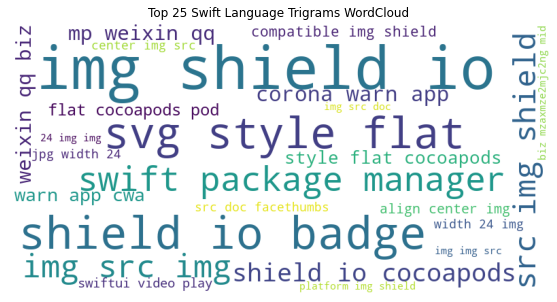

In [82]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the Trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: count for k, count in top_25_swift_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Swift Language Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

Takeaways:
- `Style`, `img` is seen frequently in the top 25 trigrams for Swift programming language. 
- There is also the term `swift package`, `src`, `svc`, etc.
    - Interesting point: The Swift compilers are mostly written in C++. So there is a high chance that the trigrams identified in Swift will be similar to C++

---

### Javascript

In [18]:
# create variable
js_words = ' '.join(javascript.lemmatized)

In [19]:
# create trigram
js_trigrams = pd.Series(nltk.ngrams(js_words.split(), 3))

In [20]:
# create count of trigrams
top_25_js_trigrams = js_trigrams.value_counts().head(25).sort_values(ascending=False)

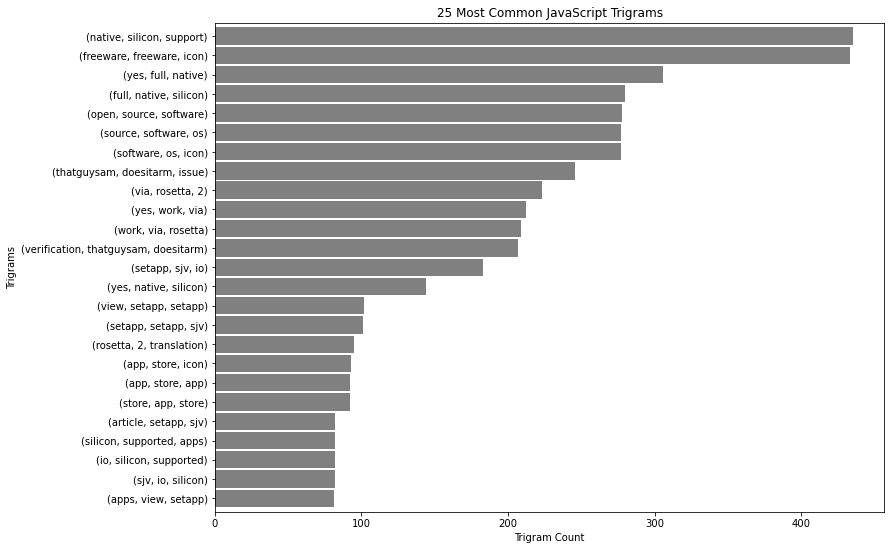

In [21]:
# visualize

top_25_js_trigrams.sort_values().plot.barh(width = .9, figsize = (12,9), color = 'grey')
plt.xlabel('Trigram Count')
plt.ylabel('Trigrams')
plt.title('25 Most Common JavaScript Trigrams')
plt.show()

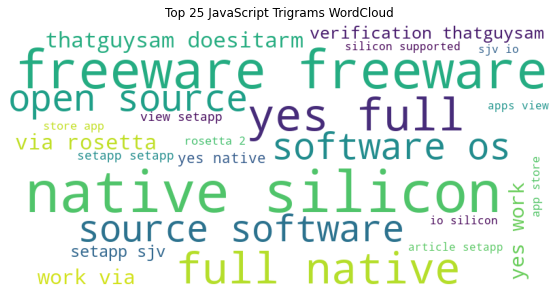

In [22]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_js_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 JavaScript Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

### Takeaways:
- `Open`, `Source`, `Freeware`, and others could be good predictors of JavaScript

---

## Objective-C

In [25]:
# create attribute string
obj_c_words = ' '.join(objective_c.lemmatized)

In [26]:
# create trigrams
obj_c_trigrams = pd.Series(nltk.ngrams(obj_c_words.split(),3))

In [27]:
# create value counts for trigrams
top_25_objc_trigrams = obj_c_trigrams.value_counts().head(25).sort_values(ascending=False)

#### added:
- introduction
- intro
- sup
- samplecod
#### to nltk stopwords

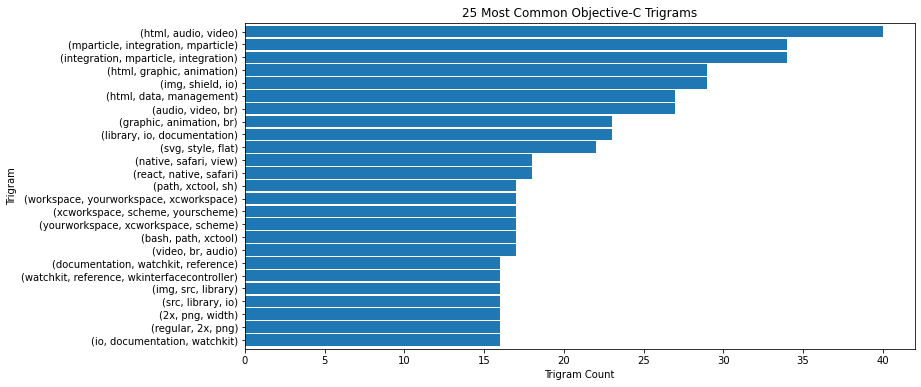

In [28]:
# Visualize the top 20 spam bigrams
top_25_objc_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common Objective-C Trigrams')
plt.show()

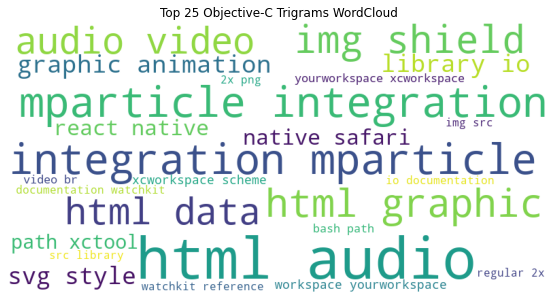

In [79]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_objc_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Objective-C Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

### Takeaways:
- Objective-C programming is the primary language used for writing OSX and iOS programs for apple devices.
- It's most common used are `html`, `audio`, `integration`, `graphic & animation`. 

---

## Python

In [80]:
python_words = ' '.join(python.lemmatized)

# create trigrams
python_trigrams = pd.Series(nltk.ngrams(python_words.split(),3))

# create value counts for trigrams
top_25_python_trigrams = python_trigrams.value_counts().head(25).sort_values(ascending=False)


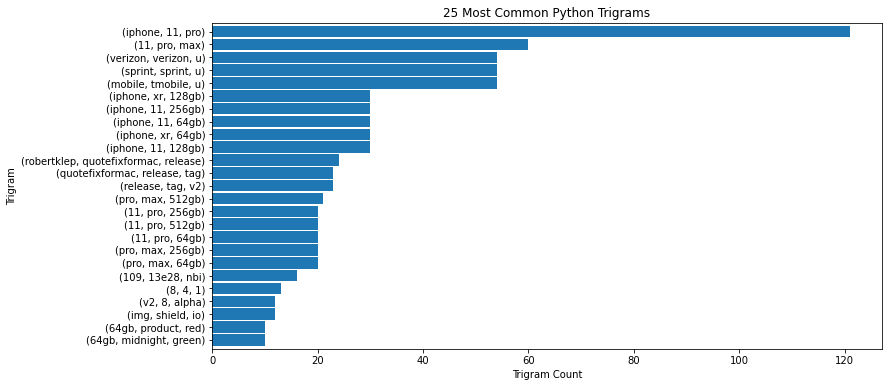

In [81]:
# Visualize the top 20 spam bigrams
top_25_python_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common Python Trigrams')
plt.show()

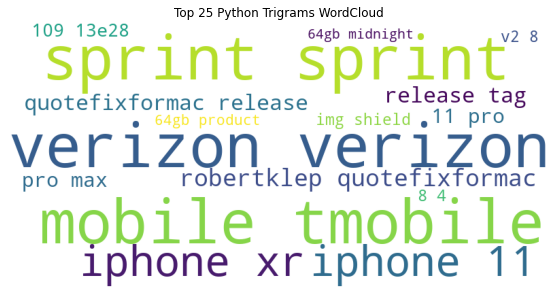

In [35]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_python_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Python Trigrams WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

---

### C Programming

In [36]:
def get_c_chart(language):
    words = ' '.join(language.lemmatized)

    # create trigrams
    trigrams = pd.Series(nltk.ngrams(words.split(),3))

    # create value counts for trigrams
    top_25_trigrams = trigrams.value_counts().head(25).sort_values(ascending=False)

    
    # Visualize the top 20 spam bigrams
    top_25_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
    plt.xlabel('Trigram Count')
    plt.ylabel('Trigram')
    plt.title(f'25 Most Common C Trigrams')
    

In [37]:
c_words = ' '.join(c.lemmatized)

# create trigrams
c_trigrams = pd.Series(nltk.ngrams(c_words.split(),3))

# create value counts for trigrams
top_25_c_trigrams = c_trigrams.value_counts().head(25).sort_values(ascending=False)

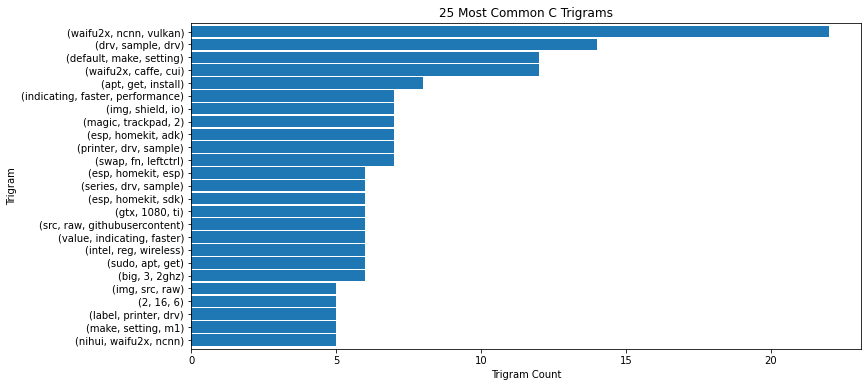

In [38]:
# Visualize the top 20 spam bigrams
top_25_c_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common C Trigrams')
plt.show()

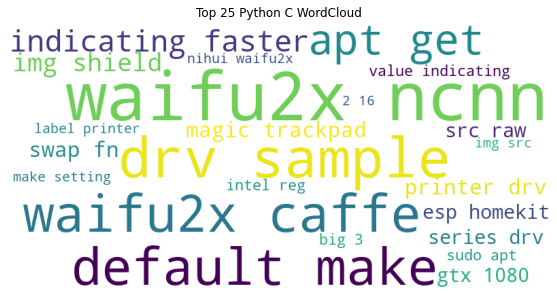

In [39]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_c_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Python C WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

- Java programming language
- C++ programming language
- Shell programming language
- PHP programming language
- C# programming language

---

## Java Programming

In [40]:
java_words = ' '.join(java.lemmatized)

# create trigrams
java_trigrams = pd.Series(nltk.ngrams(java_words.split(),3))

# create value counts for trigrams
top_25_java_trigrams = java_trigrams.value_counts().head(25).sort_values(ascending=False)

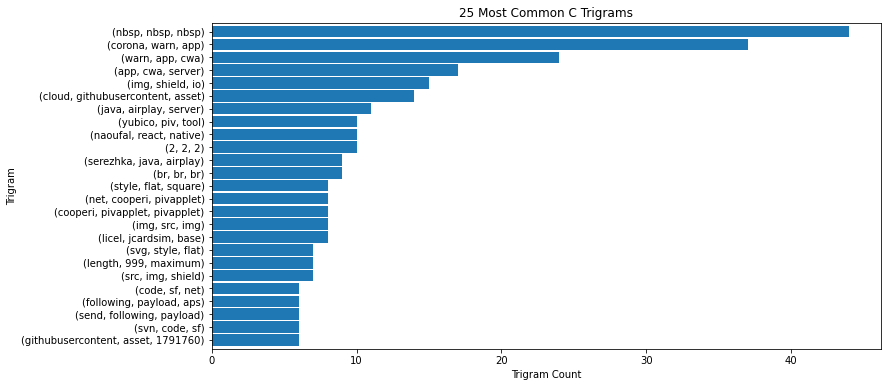

In [41]:
# Visualize the top 20 spam bigrams
top_25_java_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common C Trigrams')
plt.show()

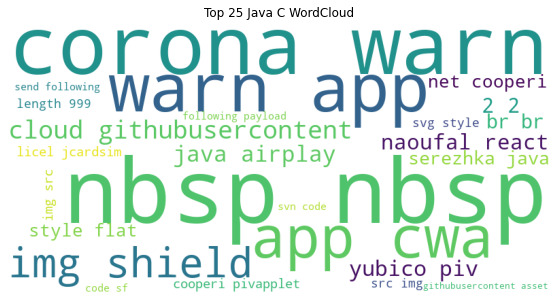

In [42]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_java_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Java C WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

---

## C++

In [44]:
c_plus_plus_words = ' '.join(c_plus_plus.lemmatized)

# create trigrams
c_plus_plus_trigrams = pd.Series(nltk.ngrams(c_plus_plus_words.split(),3))

# create value counts for trigrams
top_25_c_plus_trigrams = c_plus_plus_trigrams.value_counts().head(25).sort_values(ascending=False)

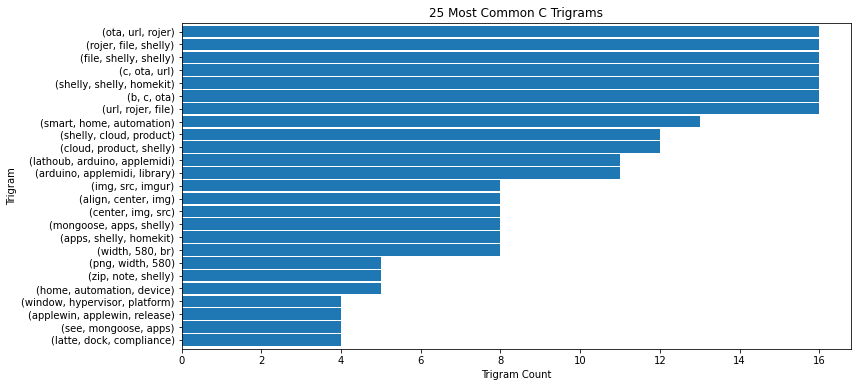

In [57]:
# Visualize the top 20 spam bigrams
top_25_c_plus_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common C Trigrams')
plt.show()

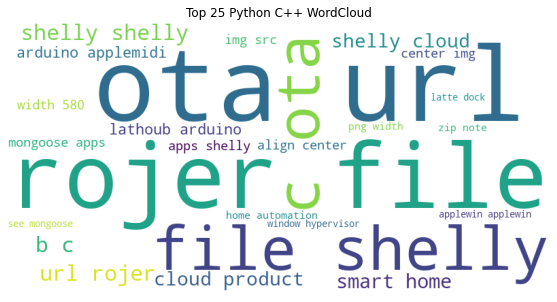

In [58]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_c_plus_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Python C++ WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

---

## Shell

In [59]:
shell_words = ' '.join(shell.lemmatized)

# create trigrams
shell_trigrams = pd.Series(nltk.ngrams(shell_words.split(),3))

# create value counts for trigrams
top_25_shell_trigrams = shell_trigrams.value_counts().head(25).sort_values(ascending=False)

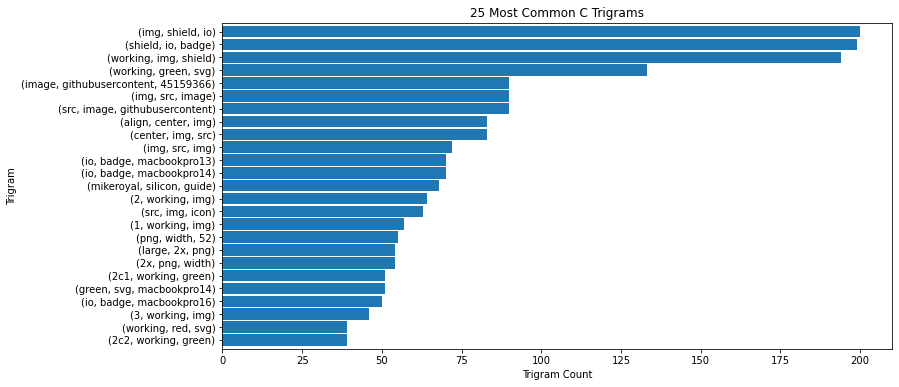

In [62]:
# Visualize the top 20 spam bigrams
top_25_shell_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common C Trigrams')
plt.show()

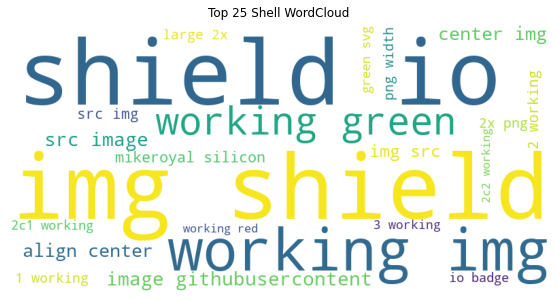

In [64]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_shell_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Shell WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

---

## PHP

In [68]:
php_words = ' '.join(php.lemmatized)

# create trigrams
php_trigrams = pd.Series(nltk.ngrams(php_words.split(),3))

# create value counts for trigrams
top_25_php_trigrams = php_trigrams.value_counts().head(25).sort_values(ascending=False)

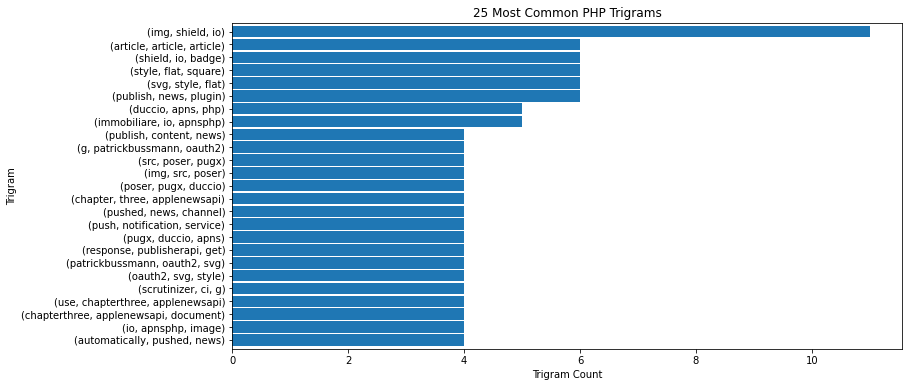

In [69]:
# Visualize the top 20 spam bigrams
top_25_php_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common PHP Trigrams')
plt.show()

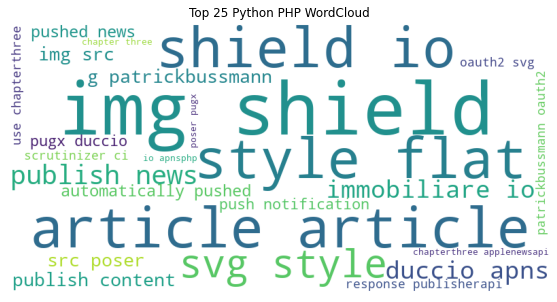

In [71]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_php_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Python PHP WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()

---

## C#

In [75]:
c_sharp_words = ' '.join(c_sharp.lemmatized)

# create trigrams
c_sharp_trigrams = pd.Series(nltk.ngrams(c_sharp_words.split(),3))

# create value counts for trigrams
top_25_c_sharp_trigrams = c_sharp_trigrams.value_counts().head(25).sort_values(ascending=False)

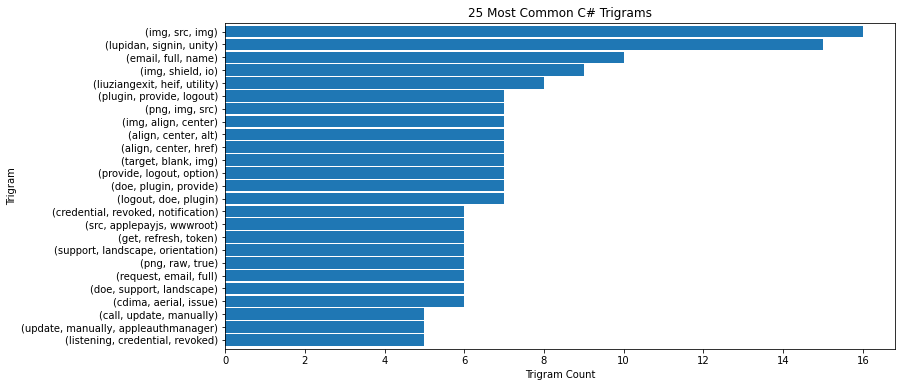

In [76]:
# Visualize the top 20 spam bigrams
top_25_c_sharp_trigrams.sort_values().plot.barh(width = .9, figsize = (12,6))
plt.xlabel('Trigram Count')
plt.ylabel('Trigram')
plt.title('25 Most Common C# Trigrams')
plt.show()

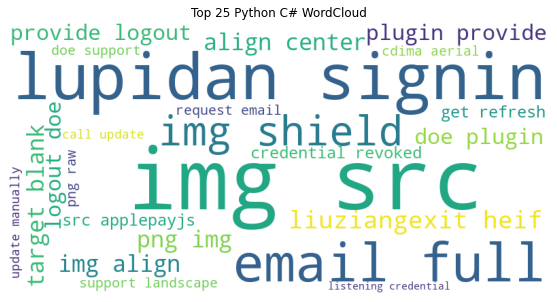

In [78]:
#Generate a wordcloud

#First create a dictionary for the fequencies of the bigrams
data = {k[0] + ' ' + k[1]: count for k, count in top_25_c_sharp_trigrams.to_dict().items()}

#Create the wordcloud
#Change the figsize before creating the wordcloud
plt.figure(figsize=(10, 5))
image = WordCloud(background_color = 'white', width = 800, height = 400).generate_from_frequencies(data)
plt.title('Top 25 Python C# WordCloud')
plt.imshow(image)
plt.axis('off')
plt.show()